## 2.3 The Gaussian Distribution

高斯分布 $\mathcal{N}\left(\mathbf{x} | \mathbf{\mu} , \Sigma\right)= \frac{1}{\left( 2\pi \right)^{D/2}}\frac{1}{\| \Sigma \|^{1/2}}\exp\left\{ -\frac{1}{2} \left(\mathbf{x}-\mathbf{\mu}\right)^{T}\Sigma^{-1}\left(\mathbf{x}-\mathbf{\mu}\right)\right\} $

其中 $\Sigma $表示 $D\times D$ 协方差矩阵， 
 
 * **高斯分布具有比较多的性质，其中有一条就是: 给定分布的均值和方差，高斯分布是熵最大的分布**
 * 根据中心极限定理，多个随机变量的和服从高斯分布 $x_1+x_2+...+x_n \sim \mathcal{N}\left(Y| \mu, \sigma\right)$

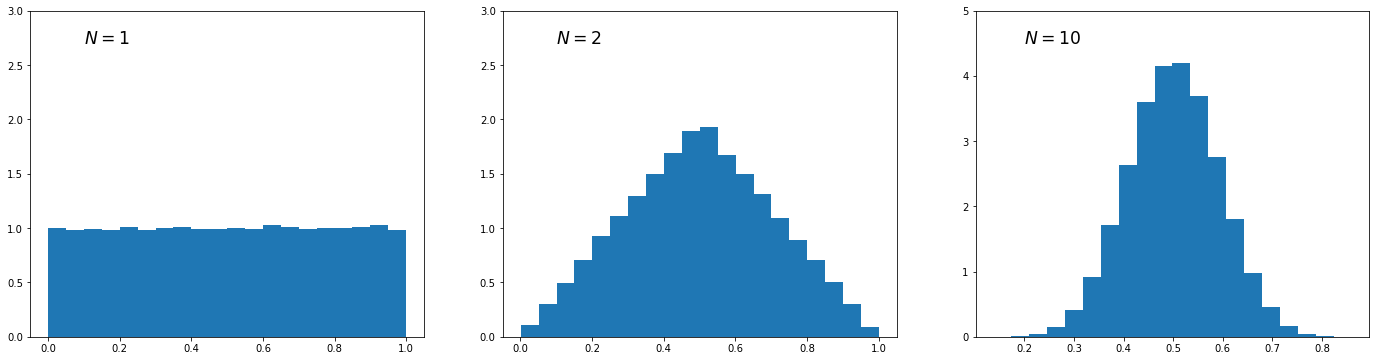

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes  = plt.subplots(1,3,figsize =[24,6]);
axes = axes.flatten();
x1 = np.random.rand(100000);
num_bins  = 20;
axes[0].hist(x1, num_bins, normed=1)
axes[0].set_ylim(0,3); axes[0].text(0.1,2.7,'$N=1$',fontsize= 'xx-large');
x2 = np.random.rand(100000);
axes[1].hist((x1+x2)/2, num_bins, normed=1)
axes[1].set_ylim(0,3); axes[1].text(0.1,2.7,'$N=2$',fontsize= 'xx-large');
x10= np.random.rand(1000000);
x10.shape = 100000,10;
x10 = np.sum(x10, axis= 1)
axes[2].hist(x10/10, num_bins, normed = 1);
axes[2].set_ylim(0,5); axes[2].text(0.2,4.5,'$N=10$',fontsize= 'xx-large');

 * 高斯分布由指数分布内的 $\Delta^2$ 决定： $\Delta^2 = \left(\mathbf{x}-\mathbf{\mu}\right)^T \Sigma^{-1} \left(\mathbf{x}-\mathbf{\mu}\right)$, 我们也称 $\Delta$ 为马氏距离，而且若 $\Sigma$ 变为单位矩阵，那么 $\Delta $ 就是欧式距离。
 
 * 对于高斯分布的协方差矩阵，我们实际上可以正交变换，也就是说： $\Sigma \mathbf{\mu_i} =\lambda \mathbf{\mu_i}, \mathbf{\mu_i^T \mu_i} = I$, 其中 $\lambda_i$ 表示特征值， $\mathbf{\mu_i} $ 表示归一化的标准特征向量，因此有 $\Sigma = \sum_{i=1}^D \lambda_i \mathbf{\mu_i\mu_i^T}$ ,他的逆也可以用特征值，特征向量表示：
 $$
 \Sigma^{-1} = \sum_{i = 1}^D \frac{1}{\lambda_i}\mathbf{u_i u_i^T}
 $$
 那么 原来的 $\Delta^2 = \sum_{i=1}^D \frac{y_i^2}{\lambda_i}$  其中 $ y_i = \mathbf{u_i^T}\left(\mathbf{x} -\mathbf{\mu}\right) $
 上式相当于对原来的随机变量 $\mathbf{x} $ 进行正交变换，变为 $\mathbf{y}$ , 且 $\mathbf{y} = \mathbf{U} \left(\mathbf{x}-\mathbf{\mu}\right)$, $\mathbf{U}$ 表示用原来的特征向量组合的矩阵，矩阵的每一行表示原来的特征矩阵 $\mathbf{u_i^T}$.
 
 * 对于前面将原来的协方差矩阵进行特征值分解，相当于对标准正态分布进行了平移和拉伸旋转，其中将原来的坐标轴转换为 $\mathbf{u_i}$ 方向，坐标轴的拉伸比例为 $\lambda_i^{1/2}$, 
 
 * 经过上述坐标转换，原来的高斯分布 $\mathbf{x}$ 转换为标准正态分布：
 $$
 p\left(\mathbf{y}\right) = \prod_{j=1}^D\frac{1}{\left(2\pi \lambda_i\right)^{1/2}}\exp\left\{-\frac{y_i^2}{2\lambda_j}\right\} 
 $$
 **经过转换之后，随机变量 $y_i$ 之间也变得互不相关，联合分布就是各自分布的乘积**

### 2.3.1 Conditional Gaussian Distribution

将高斯分布划分为两个部分 $\mathbf{x} = \left(\mathbf{x_a}, \mathbf{x_b}\right)^T$ , 若 $\mathbf{x}$ 服从正态分布，那么对均值和协方差矩阵进行对应的划分，我们可以得到： $\mathbf{\mu} = \left(\mathbf{\mu_a},\mathbf{\mu_b}\right)^T$, 和 $\Sigma = \left( \Sigma_{aa}, \Sigma_{ab}; \Sigma_{ba}, \Sigma_{bb} \right)$
那么条件分布 ： $p\left(\mathbf{x_a}|\mathbf{x_b}\right) \sim \mathcal{N} \left(\mathbf{\mu_{a|b}}, \Sigma_{a|b}\right)$
其中;
$$
\mathbf{\mu_{a|b}} = \mathbf{\mu_a} + \Sigma_{ab}\Sigma_{bb}^{-1}\left(\mathbf{x_a}- \mathbf{\mu_b}\right) \\
\Sigma_{a|b} = \Sigma_{aa} -\Sigma_{ab}\Sigma_{bb}^{-1}\Sigma_{ba}
$$

### 2.3.2 Marginal Gaussian Distribution 

* 多维高斯分布的边缘分布也是高斯分布
给定一个连个高斯随机分布: $\mathcal{N}\left(\mathbf{x} \| \mathbf{\mu}, \mathbf{\Sigma} \right)$, 且令 $\Lambda \equiv \mathbf{\sigma^{-1}}$, 那么对于划分 

$$
\mathbf{x}=\left(\mathbf{x_a}, \mathbf{x_b}\right)^T, \mathbf{\mu} =\left(\mathbf{\mu_a}, \mathbf{\mu_b}\right)^T\\
$$
$$
\Sigma = \left( \Sigma_{aa}, \Sigma_{ab}; \Sigma_{ba}, \Sigma_{bb} \right),\\
\Lambda = \left( \Lambda_{aa}, \Lambda_{ab}; \Lambda_{ba}, \Lambda_{bb} \right)
$$
得到条件分布和边缘分布：

$$
p\left(\mathbf{x_a}| \mathbf{x_b}\right) = \mathcal{N}\left(\mathbf{x}| \mathbf{x} | \mu_{a|b}, \Lambda_{aa}^{-1}\right) \\
\mathbf{\mu_{a|b}} = \mathbf{\mu_a} -\Lambda_{aa}^{-1}\Lambda_{ab}\left(\mathbf{x_b- \mu_b}\right)\\
$$
$$
p\left(\mathbf{x_a} \right)= \mathcal{N}\left(\mathbf{x_a | \mu_a, \Sigma_{aa}}\right)
$$


### 2.3.3 Bayes' theorem for Gaussian variables

给定条件分布$p\left(x|y\right)$和边缘分布$p\left(x\right)$都满足高斯分布的条件下，我们可以计算出联合概率$p\left(x,y\right)$以及 $p\left(y|x\right)$**同时为高斯分布**.

###  2.3.4 Maximum likelihood for the Gaussian

通过最大似然可以计算高斯分布的参数

$$
\mathbf{\mu_{ML}} = \frac{1}{N}\sum_{n=1}^N \mathbf{x_n}\\
\mathbf{\sigma_{ML}} = \frac{1}{N}\sum_{n=1}^N\left(\mathbf{x_n}-\mathbf{\mu_{ML}}\right)\left(\mathbf{x_n}-\mathbf{\mu_{ML}}\right)
$$

由于最大似然估计的期望为：

$$
\mathbf{E}\left[\mathbf{\mu_{ML}}\right] =\mathbf{\mu}\\
\mathbf{E}\left[\mathbf{\sigma_{ML}}\right] = \frac{N-1}{N}\mathbf{\Sigma}
$$
因此方差的估计结果修正为：
$$
\tilde{\mathbf{\Sigma}} = \frac{1}{N-1}\sum_{n=1}^N\left(\mathbf{x_n}-\mathbf{\mu_{ML}}\right)\left(\mathbf{x_n}-\mathbf{\mu_{ML}}\right)
$$

### 2.3.5 Sequential estimation

序列估计，随着观测数据的增多，实时调整对于参数的估计值；考虑前面的最大似然估计，我们同样可以采用序列估计的方式进行参数的估计；
$$
\mu_{ML}^{\left(N\right)} = \frac{1}{N} \sum_{n=1}^N \mathbf{x_n}\\
=\frac{1}{N} \mathbf{x_n} +\frac{1}{N} \sum_{n=1}^{N-1} \mathbf{x_n}\\
=\frac{1}{N} \mathbf{x_n} +\frac{1}{N} \sum_{n=1}^{N-1} \mu_{ML}^{\left(N-1\right)}\\
= \mu_{ML}^{\left(N-1\right)} +\frac{1}{N}\left(\mathbf{x_N}-\mu_{ML}^{\left(N-1\right)}\right)
$$
上述过程具有良好的解释性： 当我们观测到$N-1$ 个数据的时候，我们得到最大似然估计值 $\mu_{ML}^{\left(N-1\right)}$; 紧接着观测到新的数据 $x_N$ 时候，需要调整数据的最大似然估计，调整量为 $\frac{1}{N}\left(\mathbf{x_N}-\mu_{ML}^{\left(N-1\right)}\right)$.
随着观测数据量的增多，调整量的系数$\frac{1}{N}$越来越小.

* Robbins- Monro 算法

首先令 $f\left(\theta \right) = E\left(\mathbf{z| \theta}\right)$, 求该方程的根，即$f\left(\theta^{\star}\right) =0$

$$
\theta^{\left(N\right)} = \theta^{\left(N-1\right)}+a_{N-1}z\left(\theta^{\left(N-1\right)}\right)
$$
其中 $z\left(\theta^{\left(N\right)}\right)$ 表示当参数$\theta$ 取估计值$\theta^{\left(N\right)}$ 时的观测值，$\{a_N\}$ 表示一个正数序列，且满足一下条件
$$
\lim_{N\rightarrow \infty} a_N =0; \\
\sum_{N=1}^{\infty}a_N = \infty;\\
\sum_{N=1}^{\infty} a_N^2 < \infty
$$

对比前面介绍的最大似然序列估计方法，可以认为是Robbins-Monro 算法的特例：
取 ： $z = \frac{1}{\sigma^2}\left(x-\mu_{ML}\right), a_N =\frac{\sigma^2}{N}$

###  2.3.6 Bayesian inference for the Gaussian
通过前面对最大似然估计的介绍，我们已经掌握了对从来自高斯分布的观测数据进行参数估计的过程，首先写出似然函数，然后求令似然函数最大的参数值即可。现在需要用最大后验的方法来对参数进行估计
#### 已知方差，估计均值
假设数据来源于高斯分布，其中高斯分布的方差已经知道，我们现在需要估计该分布的均值
* 写出似然函数
$$
p\left(\mathbf{X} | \mu \right) = \prod_{n=1}^N p\left(x_n |\mu\right) \frac{1}{\left(2\pi\sigma^2\right)^{N/2}} \exp \{ -\frac{1}{2\sigma^2}\sum_{n=1}^N\left(x_n - \mu\right)^2\}
$$
**似然函数不是一个关于$\mu$ 的分布**
* 均值的先验分布表示为 $p \left(\mu\right) = \mathcal{N} \left(\mu | \mu_0, \sigma_0^2\right)$

* 后验分布 $p\left(\mu | \mathbf{X} \right) \propto p\left(\mathbf{X} | \mu \right)p \left(\mu\right) $  
* 后验分布表示为： $ p\left(\mu | \mathbf{X} \right)=\mathcal{N} \left(\mu | \mu_N, \sigma_N^2 \right) $
其中 ： $\mu_N = \frac{\sigma^2}{N\sigma_0^2+\sigma^2}\mu_0 +\frac{N\sigma_0^2}{N\sigma_0^2+\sigma^2}\mu_{ML}$,  $\frac{1}{\sigma_N^2}= \frac{1}{\sigma_0^2} +\frac{N}{\sigma^2}$

说明：随着观测数据量的增多，估计值越来越接近于最大似然估计结果，方差的倒数（我们认为是估计值的准确率），也越来越大，意味着结果也越来越准确。

实际上最大后验的方法也可以用序列的学习方法完成：

$$
p\left(\mu | D \right) \propto\left[ p\left(\mathbf{ \mu} \right)\prod_{n=1}^{N-1}p \left(\mathbf{x_n} |\mathbf{\mu}\right)\right]p\left(\mathbf{x_N}|\mathbf{\mu}\right)
$$

#### 均值已知，估计方差
现在假设均值已知，估计方差的倒数 $\lambda = 1/ \sigma^2$
* 似然函数 $p\left(\mathbf{X}| \lambda\right) = \prod_{n=1}^N \mathcal{N}\left(x_n | \mu, \lambda^{-1}\right)\propto \lambda^{N/2} \exp\{-\lambda/2 \sum_{n=1}^N \left(x_n - \mu\right)^2\}$

* 先验函数（去似然函数的共轭， Gamma函数）：$Gam\left(\lambda | a,b\right) = \frac{1}{\Gamma\left(a\right)} b^a\lambda^{a-1}\exp\left(-b \lambda\right)$, 注：均值$E\left[\lambda\right] = \frac{a}{b}$, 方差 $var\left[\lambda\right] = \frac{a}{b^2}$
* 后验分布：
$$
p\left(\lambda| \mathbf{X}\right)  =\lambda^{a_0-1} \lambda^{N/2} \exp\{-b_0 \lambda-\frac{\lambda}{2} \sum_{n=1}^N \left(x_n - \mu\right)^2\}
$$
实际上后验也是一个Gamma函数 $Gam\left(\lambda | a_N, b_N\right)$, 其中
$$
a_N = a_0+ \frac{N}{2}\\
b_N = b_0 + \frac{1}{2}\sum_{n=1}^{N}\left(x_n-\mu\right)^2 = b_0 + \frac{N}{2}\sigma_{ML}^2
$$
说明： 由于在$a_N$ 和 $b_N$的估计值中，先验分布中的参数相对于数据量 $ N$ 分别多贡献了 $2a_0$ 、 $2b_0$个数据。

#### 均值和方差均未知，计算均值方差分布分布的共轭先验


* 似然函数： 
$$
p\left(\mathbf{X}| \mu, \lambda\right) = \prod_{n=1}^N p\left(x_n |\mu\right) \frac{1}{\left(2\pi\sigma^2\right)^{N/2}} \exp \{ -\frac{1}{2\sigma^2}\sum_{n=1}^N\left(x_n - \mu\right)^2 \} \propto \left[\lambda^{1/2} \exp\left(-\frac{-\lambda\mu^2}{2}\right)\right]^N \exp\{\lambda\mu \sum_{n=1}^{N}\sum_{n=1}^N x_n -\frac{\lambda}{2}\sum_{n=1}^Nx_n^2 \}
$$

* 共轭的先验分布

$$
p\left(\mu, \lambda\right) \propto \left[\lambda^{1/2}\exp\left(\frac{\lambda\mu^2}{2}\right)\right]^\beta \exp\{ c\lambda\mu - d\lambda \}
= \exp\{-\frac{\beta\lambda}{2}\left(\mu- c/\beta\right)^2\} \lambda^{\beta/2}\exp\{-\left(d-\frac{c^2}{2\beta}\right)\lambda\}
$$

由于联合分布可以表示为 : $p\left(\mu, \lambda\right) = p\left(\mu| \lambda\right) p\left(\lambda\right)$

而前者$ p\left(\mu| \lambda\right)$是高斯分布，后者 $p\left(\lambda\right)$是Gamma分布，因此可以认为，两者的联合分布为： $p\left(\mu, \lambda\right) = \mathcal{N} \left( \mu | \mu_0, \left(\beta\lambda\right)^{-1}\right) Gam\left(\lambda | a,b\right)$;

称为normal-gamma分布或者称为Gaussian-Gamma分布



### 2.3.7 Student's t-distribution

对前面的后验x的分布中的精度方差进行积分得到：
$$
\begin{split}
p\left(x | \mu, a,b \right) &= \int_{0}^{\infty} \mathcal{N}\left(x| \mu, \tau^{-1} \right)Gam\left(\tau | a,b\right)d\tau\\
&= \int_{0}^{\infty} \frac{b^a e^{-b\tau}\tau^{a-1}}{\Gamma\left(a\right)}\left(\frac{\tau}{2\pi}\right)^{1/2} \exp\{-\frac{\tau}{2}\left(x-\mu\right)^2\}d\tau\\
&=\frac{b^a}{\Gamma\left(a\right)}\left[b+ \frac{\left(x-\mu\right)^2}{2}\right]^{-a-1/2} \Gamma\left(a+1/2\right)
\end{split}
$$
进行简单的变量替换：
$$
\begin{split}
z &= \tau\left[b+\left(x-\mu\right)^2/2\right]\\
v &= 2a, \lambda = a/b
\end{split}
$$

得到student-t 分布：
$$
St\left(x | \mu, \lambda , v\right)= \frac{\Gamma\left(v/2 +1/2\right)}{\Gamma\left(v/2\right)} \left(\frac{\lambda}{\pi v}\right)^{1/2}\left[1+\frac{\lambda\left(x-\mu\right)^2}{v}\right]^{-v/2-1/2}
$$

* 在student-t 分布中， 参数$\lambda$ 有时候被称为分布precision, 而参数 $v$ 被称为**自由度**， 当自由度$v=1$ 时， 该分布退化为Cauthy 分布，当$v\rightarrow +\infty $ 时，该分布退化为均值是$\mu$ ,方差为 $1/\lambda$高斯分布。

* student-t 分布可以被认为是无数个均值相等，方差不等的高斯分布的和，是一个有长尾（longer "tails"） 的高斯分布。

* student-t 分布对于拥有异常值的参数估计过程更加**鲁棒** ， 相比于高斯分布，若原始数据中有少量的异常值，当我们采用最大似然方法估计student-t 分布和高斯分布中的参数时，student-t 的参数估计结果更加稳定。


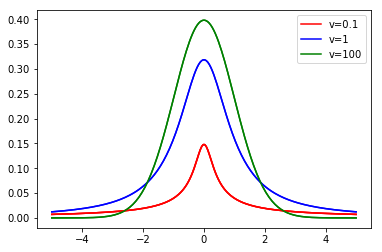

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma
mu =0; lambda0 = 1; plotx = np.linspace(-5,5,200);
v = 0.1; ploty1 = gamma(v/2+0.5)/gamma(v/2)*(lambda0/np.pi/v)**(0.5)*(1+ (lambda0*(plotx-mu)**2)/v)**(-v/2-0.5);
plt.plot(plotx, ploty1,'r',label = 'v=0.1');
v = 1; ploty2 = gamma(v/2+0.5)/gamma(v/2)*(lambda0/np.pi/v)**(0.5)*(1+ (lambda0*(plotx-mu)**2)/v)**(-v/2-0.5);
plt.plot(plotx, ploty2,'b',label= 'v=1');
v = 100; ploty3 = gamma(v/2+0.5)/gamma(v/2)*(lambda0/np.pi/v)**(0.5)*(1+ (lambda0*(plotx-mu)**2)/v)**(-v/2-0.5);
plt.plot(plotx, ploty3,'g',label= 'v=100');
plt.legend()
plt.show();
